# Welcome to Modal notebooks!

Write Python code and collaborate in real time. Your code runs in Modal's
**serverless cloud**, and anyone in the same workspace can join.

This notebook comes with some common Python libraries installed. Run
cells with `Shift+Enter`.

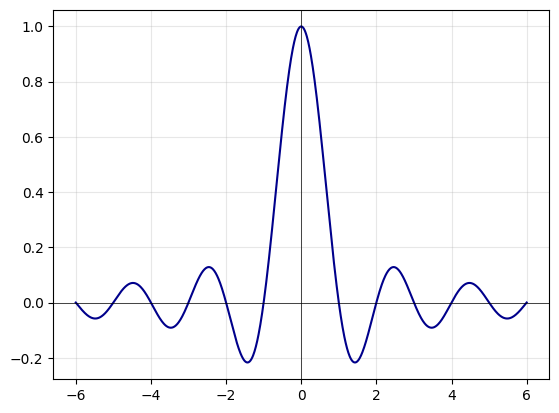

In [1]:
import matplotlib.pyplot as plt
import numpy as np

x = np.linspace(-6, 6, 1000)
y = np.sinc(x)

plt.plot(x, y, color="darkblue")
plt.axhline(0, color="black", linewidth=0.5)
plt.axvline(0, color="black", linewidth=0.5)
plt.grid(True, alpha=0.3)

In [1]:
import zipfile
import os

zip_path = "llama3-8b-scitldr-ft.zip"          # path to zip file
extract_path = "data_folder"   # destination folder

os.makedirs(extract_path, exist_ok=True)

with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(extract_path)

print("Extraction complete.")


Extraction complete.


In [2]:
!pip install unsloth

INFO: pip is looking at multiple versions of torchvision to determine which version is compatible with other requirements. This could take a while.
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 59.1/59.1 MB 214.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 557.0/557.0 kB 279.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.0/12.0 MB 170.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 110.8/110.8 MB 188.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 915.7/915.7 MB 179.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 188.3/188.3 MB 193.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.2/12.2 MB 209.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 594.3/594.3 MB 205.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.2/10.2 MB 195.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 88.0/88.0 MB 207.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

In [1]:
from unsloth import FastLanguageModel
import torch

base_model_name = "meta-llama/Meta-Llama-3-8B"

model, tokenizer = FastLanguageModel.from_pretrained(
    model_name = base_model_name,
    max_seq_length = 6000,
    dtype = torch.bfloat16,
    load_in_4bit = True,
)


🦥 Unsloth: Will patch your computer to enable 2x faster free finetuning.
🦥 Unsloth Zoo will now patch everything to make training faster!
==((====))==  Unsloth 2026.1.4: Fast Llama patching. Transformers: 4.57.6.
   \\   /|    NVIDIA A10. Num GPUs = 1. Max memory: 22.058 GB. Platform: Linux.
O^O/ \_/ \    Torch: 2.10.0+cu128. CUDA: 8.6. CUDA Toolkit: 12.8. Triton: 3.6.0
\        /    Bfloat16 = TRUE. FA [Xformers = 0.0.34. FA2 = False]
 "-____-"     Free license: http://github.com/unslothai/unsloth
Unsloth: Fast downloading is enabled - ignore downloading bars which are red colored!


In [2]:
from peft import PeftModel

checkpoint_path = "/root/data_folder/llama3-8b-summary-finetuned-scitldr/checkpoint-3095"

model = PeftModel.from_pretrained(
    model,
    checkpoint_path,
)


In [3]:
FastLanguageModel.for_inference(model)


PeftModelForCausalLM(
  (base_model): LoraModel(
    (model): LlamaForCausalLM(
      (model): LlamaModel(
        (embed_tokens): Embedding(128256, 4096, padding_idx=128255)
        (layers): ModuleList(
          (0-31): 32 x LlamaDecoderLayer(
            (self_attn): LlamaAttention(
              (q_proj): lora.Linear4bit(
                (base_layer): Linear4bit(in_features=4096, out_features=4096, bias=False)
                (lora_dropout): ModuleDict(
                  (default): Identity()
                )
                (lora_A): ModuleDict(
                  (default): Linear(in_features=4096, out_features=16, bias=False)
                )
                (lora_B): ModuleDict(
                  (default): Linear(in_features=16, out_features=4096, bias=False)
                )
                (lora_embedding_A): ParameterDict()
                (lora_embedding_B): ParameterDict()
                (lora_magnitude_vector): ModuleDict()
              )
              (k_proj): lor

In [4]:
prompt = """### Instruction:
Write a comprehensive summary of the key developments in artificial intelligence over the past decade.

### Response:
"""


inputs = tokenizer(prompt, return_tensors="pt").to("cuda")

outputs = model.generate(
    **inputs,
    max_new_tokens = 2048,
    temperature = 0.7,
    do_sample = True,
)

print(tokenizer.decode(outputs[0], skip_special_tokens=True))


### Instruction:
Write a comprehensive summary of the key developments in artificial intelligence over the past decade.

### Response:
[SUMMARY] Recent advances in deep reinforcement learning have made remarkable progress in solving complex decision-making problems.


In [4]:
tokenizer.chat_template = """{% if messages[0]['role'] == 'system' %}
{{ '<|begin_of_text|>' }}
{% for message in messages %}
{% if message['role'] == 'system' %}
{{ '<|start_header_id|>system<|end_header_id|>\n' + message['content'] + '<|eot_id|>' }}
{% elif message['role'] == 'user' %}
{{ '<|start_header_id|>user<|end_header_id|>\n' + message['content'] + '<|eot_id|>' }}
{% elif message['role'] == 'assistant' %}
{{ '<|start_header_id|>assistant<|end_header_id|>\n' + message['content'] + '<|eot_id|>' }}
{% endif %}
{% endfor %}
{% else %}
{{ '<|begin_of_text|>' }}
{% for message in messages %}
{{ '<|start_header_id|>' + message['role'] + '<|end_header_id|>\n' + message['content'] + '<|eot_id|>' }}
{% endfor %}
{% endif %}
{{ '<|start_header_id|>assistant<|end_header_id|>\n' }}
"""


In [6]:
# def build_prompt(text):
#     messages = [
#         {
#             "role": "system",
#             "content": (
#                 "You are an expert news editor. "
#                 "You must follow the output format strictly."
#             )
#         },
#         {
#             "role": "user",
#             "content": (
#                 "Summarize the following news article.\n\n"
#                 "IMPORTANT RULES:\n"
#                 "1. Your answer MUST start with exactly the token [SUMMARY].\n"
#                 "2. Write a descriptive 8-9 sentence summary in plain English.\n"
#                 "3. Do NOT include direct quotes, lists, numbers-only text, or repeated filler words.\n"
#                 "4. Please do not copy sentences from the article in any way.\n\n"
#                 "[SUMMARY]\n"
#                 f"{text}"
#             )
#         }
#     ]

#     return tokenizer.apply_chat_template(
#         messages,
#         tokenize=False,
#         add_generation_prompt=True
#     )


In [26]:
def build_prompt(text):
    messages = [
        {
            "role": "system",
            "content": (
                "You are an expert scientific paper summarizer. "
                "You must strictly follow the required output format."
            )
        },
        {
            "role": "user",
            "content": (
                "Write a concise TL;DR summary of the following scientific document.\n\n"
                "IMPORTANT RULES:\n"
                "1. Write a concise summary of 100 words maximum.\n"
                "2. Focus strictly on the core contribution or main finding.\n"
                "3. Do NOT include background, motivation, examples, or future work.\n"
                "4. Do NOT copy phrases or sentences from the document.\n"
                "5. Use clear, formal, scientific language.\n\n"
                f"{text}"
            )
        }
    ]

    return tokenizer.apply_chat_template(
        messages,
        tokenize=False,
        add_generation_prompt=True
    )


In [27]:
@torch.inference_mode()
def generate_single(prompt, max_new_tokens=256):
    inputs = tokenizer(
        prompt,
        return_tensors="pt",
        truncation=True,
        max_length=6000
    ).to(model.device)
    
    outputs = model.generate(
        **inputs,
        max_new_tokens=max_new_tokens,
        temperature=0.1,
        do_sample=True,
        use_cache=True,
    )
    
    return tokenizer.decode(
        outputs[0, inputs["input_ids"].shape[1]:],
        skip_special_tokens=True
    )

In [9]:
!pip install tqdm


[notice] A new release of pip is available: 24.3.1 -> 26.0.1
[notice] To update, run: pip install --upgrade pip


In [28]:
from tqdm import tqdm

def summarize_texts(texts):
    summaries = []
    
    for text in tqdm(texts, desc="Summarizing", unit="article"):
        prompt = build_prompt(text)
        summary = generate_single(prompt)
        summaries.append(summary)
    
    return summaries

In [29]:
import pandas as pd

def summarize_csv(csv_path, text_column="text"):
    df = pd.read_csv(csv_path)
    texts = df[text_column].astype(str).tolist()
    
    generated_summaries = summarize_texts(texts)
    
    df["generated_summary"] = generated_summaries  # NEW COLUMN NAME
    return df

In [18]:
import pandas as pd

# Load full CSV
df_full = pd.read_csv("data_SCITLDR.csv")

# Take first 8 rows
df_test = df_full.head(5)


# Save test CSV
test_csv = "data_test_8rows.csv"
df_test.to_csv(test_csv, index=False)

print(f"Saved test CSV with {len(df_test)} rows → {test_csv}")


Saved test CSV with 5 rows → data_test_8rows.csv


In [19]:
# df_test.iloc[0]

In [30]:
input_csv = "data_SCITLDR.csv"

df = summarize_csv(
    input_csv,
    text_column="text"
)

df.to_csv("output_with_summaries_SKITLDR.csv", index=False)
print("Saved output_with_summaries2_SKITLDR.csv")

Summarizing: 100%|████████████████████████████████████████████████████| 973/973 [2:08:47<00:00,  7.94s/article]


Saved output_with_summaries2_SKITLDR.csv


Loading base model and merging with LoRA adapter using Unsloth...
==((====))==  Unsloth 2026.1.4: Fast Llama patching. Transformers: 4.57.6.
   \\   /|    NVIDIA A100-SXM4-80GB. Num GPUs = 1. Max memory: 79.251 GB. Platform: Linux.
O^O/ \_/ \    Torch: 2.10.0+cu128. CUDA: 8.0. CUDA Toolkit: 12.8. Triton: 3.6.0
\        /    Bfloat16 = TRUE. FA [Xformers = 0.0.34. FA2 = False]
 "-____-"     Free license: http://github.com/unslothai/unsloth
Unsloth: Fast downloading is enabled - ignore downloading bars which are red colored!


/usr/local/lib/python3.12/site-packages/peft/tuners/lora/bnb.py:397: UserWarning: Merge lora module to 4-bit linear may get different generations due to rounding errors.
  warnings.warn(


✅ Merged model saved to ./merged_model
Memory cleared, ready for vLLM initialization


In [81]:
df_testing = pd.read_csv("output_with_summaries_part2.csv")

In [ ]:
df_testing.iloc[0]

In [82]:
df_testing.shape

(5000, 3)

In [83]:
!pip install datasets huggingface_hub pandas



[notice] A new release of pip is available: 24.3.1 -> 26.0.1
[notice] To update, run: pip install --upgrade pip


In [86]:
from huggingface_hub import login

login(token="")


In [88]:
from datasets import load_dataset

dataset = load_dataset(
    "csv",
    data_files="output_with_summaries.csv"
)


Generating train split: 0 examples [00:00, ? examples/s]

In [89]:
dataset.push_to_hub("Abhishekkk3/Dailymail5000")


Uploading the dataset shards:   0%|          | 0/1 [00:00<?, ? shards/s]

Creating parquet from Arrow format:   0%|          | 0/1 [00:00<?, ?ba/s]

Processing Files (0 / 0)                : |          |  0.00B /  0.00B            

New Data Upload                         : |          |  0.00B /  0.00B            

                                        : 100%|#########9| 14.2MB / 14.2MB            

CommitInfo(commit_url='https://huggingface.co/datasets/Abhishekkk3/Dailymail5000/commit/ad39e54d3de6f9deca812a2e8f9eda5fd10cafbf', commit_message='Upload dataset', commit_description='', oid='ad39e54d3de6f9deca812a2e8f9eda5fd10cafbf', pr_url=None, repo_url=RepoUrl('https://huggingface.co/datasets/Abhishekkk3/Dailymail5000', endpoint='https://huggingface.co', repo_type='dataset', repo_id='Abhishekkk3/Dailymail5000'), pr_revision=None, pr_num=None)

In [90]:
from datasets import load_dataset

ds = load_dataset("Abhishekkk3/Dailymail5000")
ds


README.md:   0%|          | 0.00/359 [00:00<?, ?B/s]

data/train-00000-of-00001.parquet:   0%|          | 0.00/14.2M [00:00<?, ?B/s]

Generating train split:   0%|          | 0/5000 [00:00<?, ? examples/s]

DatasetDict({
    train: Dataset({
        features: ['text', 'summary', 'generated_summary'],
        num_rows: 5000
    })
})

In [92]:
# Convert train split to pandas DataFrame
df = ds["train"].to_pandas()

df.head()


,text,summary,generated_summary
0,"By . Fiona Macrae . PUBLISHED: . 06:53 EST, 5 ...",Kevan Sheehan discovered the fossils of the pr...,[SUMMARY] The Pliosaurus kevani ruled the ocea...
1,An obsessive woman who made her ex-boyfriend's...,"Tawny Blazejowksi, 41, launched a campaign of ...","[SUMMARY] Tawny Blazejowski, 41, of St. August..."
2,The International Cricket Council has decided ...,Chief executive Dave Richardson decides not to...,[SUMMARY] The International Cricket Council ha...
3,By . Alasdair Glennie for the Daily Mail . The...,"Diana Beard, 69, was accused of sabotaging Iai...",[SUMMARY] Iain Watters and Diana Beard will be...
4,(CNN) -- Could search crews be just a few hund...,"A grainy sonar image has been spotted, an airc...",[SUMMARY] Could search crews be just a few hun...


In [93]:
import pandas as pd

csv_path = "output_with_summaries.csv"
json_path = "output.json"

df = pd.read_csv(csv_path)

df.to_json(
    json_path,
    orient="records",   # list of JSON objects
    indent=2
)
